<a href="https://colab.research.google.com/github/alexuqt/neural-networks/blob/main/1_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
plt.imshow(x_train[0], cmap='Greys')

In [ ]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4662 - accuracy: 0.8778


In [ ]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

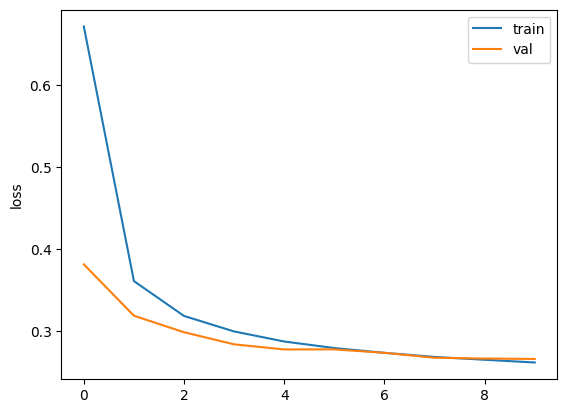

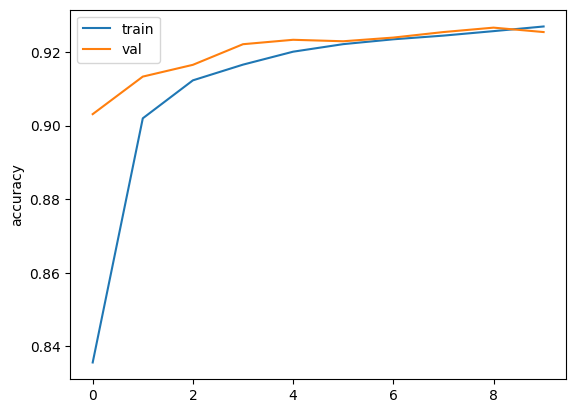

In [ ]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2663 - accuracy: 0.9254


[0.2662510275840759, 0.9254000186920166]

1/1 [==============================] - 0s 21ms/step
7 -> 7 (99.59%)
----------------------------------------------------------
2 -> 2 (99.29%)
----------------------------------------------------------
1 -> 1 (97.47%)
----------------------------------------------------------
0 -> 0 (99.97%)
----------------------------------------------------------
4 -> 4 (95.69%)
----------------------------------------------------------
1 -> 1 (99.08%)
----------------------------------------------------------
4 -> 4 (97.73%)
----------------------------------------------------------
9 -> 9 (97.06%)
----------------------------------------------------------
5 -> 6 (99.79%)
----------------------------------------------------------
9 -> 9 (93.48%)
----------------------------------------------------------


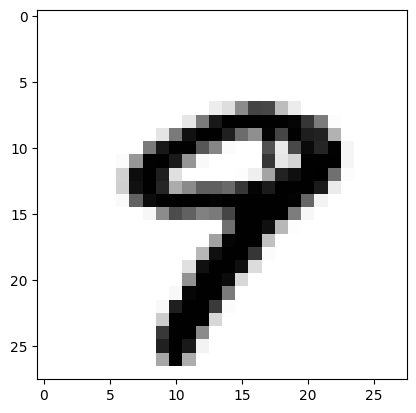

In [ ]:
num_images = 10
probs = model_lr.predict(x_test[:num_images])
preds = np.argmax(probs, axis=1)
res = y_test[:num_images]
for i in range(num_images):
    if(res[i] == preds[i]):
      correction_color = color.GREEN
    else:
      correction_color = color.RED

    print(str(res[i]) + " -> " + correction_color + str(preds[i]) + " (" + str(round(10000*probs[i][preds[i]])/100) + "%)" + color.END)

    plt.imshow(x_test[i], cmap="Greys")
    #plt.show()
    print("----------------------------------------------------------")

In [ ]:
model_lr.predict(x_test[18].reshape(1,28,28))

1/1 [==============================] - 0s 34ms/step


array([[2.2719975e-04, 2.5887681e-05, 1.9543380e-01, 6.5632492e-01,
        5.5673980e-04, 5.3209264e-02, 3.2928538e-02, 5.1240600e-05,
        6.1218444e-02, 2.3936711e-05]], dtype=float32)